#  task:Review Standford ML course & practing Python

## chapter 4: model training

### linear regression

review hypothesis and cost function first.

$h(\Theta)=\theta^TX$, both $\theta$ and $X$ are n+1 dimensional vectors.(with bias unit $\theta_0$)

$J(\Theta)=\frac{1}{m}(\theta^TX-y)^2$


2 way to solve $\theta$:
1. `The normal equation` (Distance estimation in Probability)
2. `Gradient Descent` (Maximum likelihood inp Probability)

In [109]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from sklearn.linear_model import LinearRegression

In [15]:
def hypothesis(x,theta):
    return x.dot(theta)

In [51]:
def cost_fun(X,y,theta,m):
    sub=hypothesis(X,theta)-y
    return ((sub.T.dot(sub))/m).ravel()

### 1. The normal equation
$\theta=(X^TX)^{-1}\cdot X^T\cdot Y$

In [1]:
# create random linear data to fit

In [2]:
X=2*np.random.rand(100,1)
y=4+3*X+np.random.randn(100,1)
plt.plot(X,y,'bo')
plt.ylabel('y')
plt.xlabel('x')
plt.show()

<Figure size 640x480 with 1 Axes>

In [3]:
#using linear algebra lib from np to solve
# inverse inv() 
# dot mutiply dot()

#add X0 (bias unit)
X_b=np.c_[np.ones((100,1)),X]
theta_best=inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [4]:
#see result
theta_best

array([[3.78399893],
       [3.18511151]])

our suitable hypothesis should be $h(x)=4+3X$
because of data's noise, our "best" $\theta$ also have little biased.

draw our hypothesis

In [8]:
X_new=np.array([[0],[2]])
X_new_b=np.c_[np.ones((2,1)),X_new]
y_predict=X_new_b.dot(theta_best)
y_predict

array([[ 3.78399893],
       [10.15422194]])

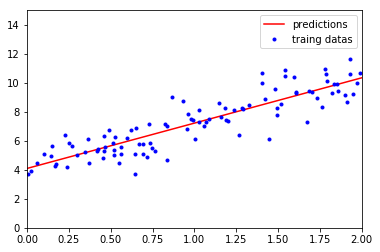

In [25]:
plt.plot(X_new,y_predict,'r-',label="predictions")
plt.plot(X,y,'b.',label="traing datas")
plt.axis([0,2,0,15])
plt.legend()
plt.show()

### using Scikit-Learn to solve 

In [26]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_ # the theta

(array([4.09322414]), array([[3.12731953]]))

In [27]:
lin_reg.predict(X_new)

array([[ 4.09322414],
       [10.34786319]])

### time & space cost
though the normal equation can directly work out the best answer.
It doesn't suit for large scale of data.

## About GD

1. ### Batch Gradient Descent

 - fatal parameter:`learning rate α`
 > try dynamic learning rate and set threashhold $\epsilon$ 
 - sensetive to scaling ( need to standardized )
 - rate of convergence: $O(\frac{1}{iterations})$
 - disadvantages:
 > using whole size to train. Computational exspensive.

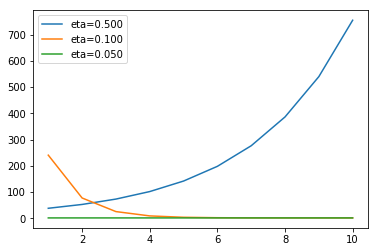

In [91]:
# implement batch GD

etas=[0.5,0.1,0.05] #learning rate
m=100 #size of examples
n_iterations=10 

#theta=np.random.randn(2,1)
theta=np.ones((2,1))

for eta in etas:
    J=[]
    for iteration in range(n_iterations):
        theta-=2*eta/m*X_b.T.dot(hypothesis(X_b,theta)-y)
        J.append(cost_fun(X_b,y,theta,m))
    plt.plot(range(1,n_iterations+1),J,label="eta=%.3f"%eta)
    plt.legend()
plt.show()


from pic above we can clearly see the important of learning rate

In [34]:
theta

array([[3.78480341],
       [3.18443244]])

### 2. SGD  
**SA(simulated annealing)**
- can skip local optimum
- find The approximate optimal solution
- learning rate must be dynamic ( use a `learning_schedule` to realize)

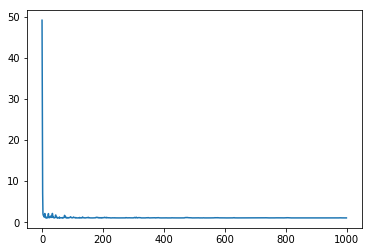

In [99]:
n_epochs = 10 
t0, t1 = 5, 50  #learning_schedule hyper-parameter

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)

J=[]
for epoch in range(n_epochs):
    for i in range(m):
        #stochastic
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        
        gradients = 2 * xi.T.dot(hypothesis(xi,theta)-yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        J.append(cost_fun(X_b,y,theta,m))
        
plt.plot(J)

we can see wave in cost_fun's values

## Polynomial regression

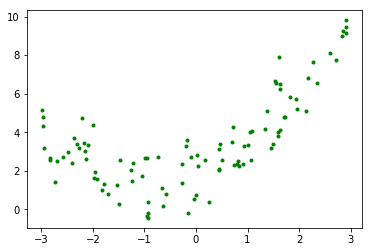

In [114]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
plt.plot(X,y,'g.')

In [115]:
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=2,include_bias=False)
X_poly=poly_features.fit_transform(X)

(array([1.86697917]), array([[0.96386619, 0.56106639]]))

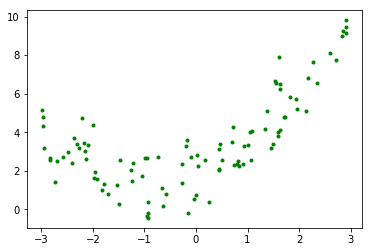

In [116]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
plt.plot(X,y,'g.')
plt.plot(lin_reg.intercept_, lin_reg.coef_,'r-')
lin_reg.intercept_, lin_reg.coef_